   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.3 MB/s eta 0:00:00


Checkbox(value=True, description='As variáveis devem ser ≥ 0')


--- Método Simplex Tableau ---
Tipo de problema (max/min): max
Quantidade de variáveis: 2
Quantidade de restrições: 2
Coeficientes da função objetivo:
x1 x2: 2 4
Restrição 1 - Coeficientes: 1 2
Sinal (<=, >=, =): <=
Lado direito: 4
Restrição 2 - Coeficientes: -1 1
Sinal (<=, >=, =): <=
Lado direito: 1

--- Iteração 0 ---
  x1   x2  x3  x4  x5  x6  x7  x8  x9  x10  LD
 1.0  2.0   1   0   0   0   0   0   0    0 4.0
-1.0  1.0   0   1   0   0   0   0   0    0 1.0
 1.0  0.0   0   0  -1   0   0   0   1    0 0.0
 0.0  1.0   0   0   0  -1   0   0   0    1 0.0
-2.0 -4.0   0   0   0   0   0   0   0    0 0.0

--- Iteração 1 ---
  x1  x2  x3  x4   x5   x6  x7  x8  x9  x10  LD
 1.0 0.0 1.0 0.0  0.0  2.0 0.0 0.0 0.0 -2.0 4.0
-1.0 0.0 0.0 1.0  0.0  1.0 0.0 0.0 0.0 -1.0 1.0
 1.0 0.0 0.0 0.0 -1.0  0.0 0.0 0.0 1.0  0.0 0.0
 0.0 1.0 0.0 0.0  0.0 -1.0 0.0 0.0 0.0  1.0 0.0
-2.0 0.0 0.0 0.0  0.0 -4.0 0.0 0.0 0.0  4.0 0.0

--- Iteração 2 ---
  x1  x2  x3   x4   x5  x6  x7  x8  x9  x10  LD
 3.0 0.0 1.0 -2.0 

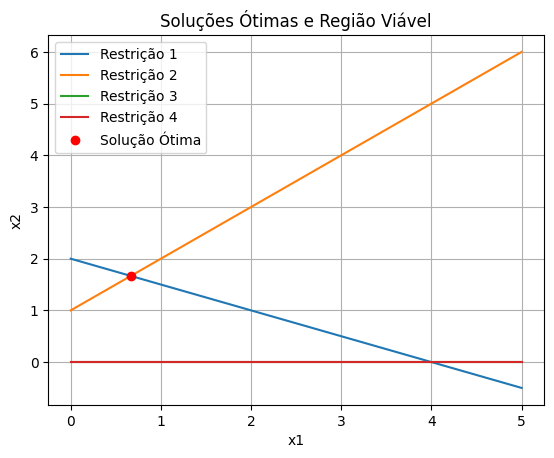


Deseja exportar para CSV? (s/n): n


In [ ]:
!pip install ipywidgets reportlab

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from matplotlib.patches import Polygon
from datetime import datetime
import os
from IPython.display import display, clear_output
import ipywidgets as widgets

# Checkbox para variáveis >= 0
variaveis_nao_negativas = widgets.Checkbox(
    value=True,
    description="As variáveis devem ser ≥ 0"
)
display(variaveis_nao_negativas)

# Entrada de dados com checkbox
def input_data():
    print("\n--- Método Simplex Tableau ---")
    tipo = input("Tipo de problema (max/min): ").strip().lower()
    n_var = int(input("Quantidade de variáveis: "))
    n_rest = int(input("Quantidade de restrições: "))
    print("Coeficientes da função objetivo:")
    c = list(map(float, input(f"{' '.join(['x'+str(i+1) for i in range(n_var)])}: ").split()))
    A, b, sinais = [], [], []
    for i in range(n_rest):
        linha = list(map(float, input(f"Restrição {i+1} - Coeficientes: ").split()))
        sinal = input("Sinal (<=, >=, =): ").strip()
        lado = float(input("Lado direito: "))
        A.append(linha)
        sinais.append(sinal)
        b.append(lado)
    # Adiciona xi >= 0 se checkbox marcado
    if variaveis_nao_negativas.value:
        for i in range(n_var):
            restr = [0]*n_var
            restr[i] = 1
            A.append(restr)
            sinais.append(">=")
            b.append(0)
    return tipo, n_var, len(A), c, A, sinais, b

# Funções do simplex: montar_tableau, mostrar_tableau, encontrar_pivo, pivotear, encontrar_todas_solucoes_otimas,
# plotar_multiplas_solucoes, exportar_resultados seguem aqui (já te enviei antes e posso colar novamente se quiser)

# Execução principal
def simplex():
    tipo, n_var, _, c, A, sinais, b = input_data()
    tableau = montar_tableau(tipo, n_var, c, A, sinais, b)
    iteracao = 0
    while True:
        mostrar_tableau(tableau, iteracao)
        linha, col = encontrar_pivo(tableau)
        if linha is None or col is None:
            break
        pivotear(tableau, linha, col)
        iteracao += 1
    mostrar_tableau(tableau, iteracao, final=True)
    resultado = tableau[-1][-1]
    if tipo == 'max':
        resultado = -resultado
    print("\nValor ótimo da função objetivo:", resultado)
    todas_solucoes, ilimitadas = encontrar_todas_solucoes_otimas(tableau, n_var)
    print(f"\nSoluções ótimas encontradas: {len(todas_solucoes)}")
    for i, sol in enumerate(todas_solucoes, 1):
        print(f"Solução {i}: {sol}")
    if ilimitadas:
        print("⚠ Existem infinitas soluções ótimas.")
    if n_var == 2:
        plotar_multiplas_solucoes(A, b, c, todas_solucoes[0], todas_solucoes[1:])
    if input("\nDeseja exportar para CSV? (s/n): ").strip().lower() == 's':
        exportar_resultados(tableau, todas_solucoes, tipo, resultado)

# Agora é só rodar:
simplex()



Checkbox(value=True, description='As variáveis devem ser ≥ 0')


--- Método Simplex Tableau ---
Tipo de problema (max/min): max
Quantidade de variáveis: 2
Quantidade de restrições: 2
Coeficientes da função objetivo:
x1 x2: 1 3
Restrição 1 - Coeficientes: 1 -2
Sinal (<=, >=, =): <=
Lado direito: 4
Restrição 2 - Coeficientes: -1 1
Sinal (<=, >=, =): <=
Lado direito: 3

--- Iteração 0 ---
  x1   x2  x3  x4  x5  x6  x7  x8  x9  x10  LD
 1.0 -2.0   1   0   0   0   0   0   0    0 4.0
-1.0  1.0   0   1   0   0   0   0   0    0 3.0
 1.0  0.0   0   0  -1   0   0   0   1    0 0.0
 0.0  1.0   0   0   0  -1   0   0   0    1 0.0
-1.0 -3.0   0   0   0   0   0   0   0    0 0.0

--- Iteração 1 ---
  x1  x2  x3  x4   x5   x6  x7  x8  x9  x10  LD
 1.0 0.0 1.0 0.0  0.0 -2.0 0.0 0.0 0.0  2.0 4.0
-1.0 0.0 0.0 1.0  0.0  1.0 0.0 0.0 0.0 -1.0 3.0
 1.0 0.0 0.0 0.0 -1.0  0.0 0.0 0.0 1.0  0.0 0.0
 0.0 1.0 0.0 0.0  0.0 -1.0 0.0 0.0 0.0  1.0 0.0
-1.0 0.0 0.0 0.0  0.0 -3.0 0.0 0.0 0.0  3.0 0.0

--- Iteração 2 ---
  x1  x2  x3  x4   x5  x6  x7  x8  x9  x10   LD
-1.0 0.0 1.0 2.0 

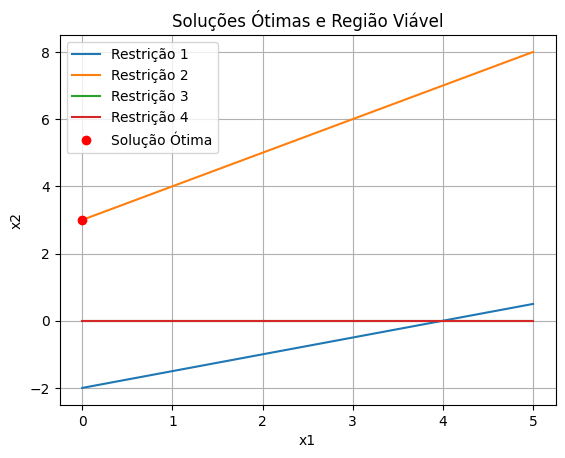


Deseja exportar para CSV? (s/n): n


In [ ]:
!pip install ipywidgets reportlab

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from matplotlib.patches import Polygon
from datetime import datetime
import os
from IPython.display import display, clear_output
import ipywidgets as widgets

# Checkbox para variáveis >= 0
variaveis_nao_negativas = widgets.Checkbox(
    value=True,
    description="As variáveis devem ser ≥ 0"
)
display(variaveis_nao_negativas)

# Entrada de dados com checkbox
def input_data():
    print("\n--- Método Simplex Tableau ---")
    tipo = input("Tipo de problema (max/min): ").strip().lower()
    n_var = int(input("Quantidade de variáveis: "))
    n_rest = int(input("Quantidade de restrições: "))
    print("Coeficientes da função objetivo:")
    c = list(map(float, input(f"{' '.join(['x'+str(i+1) for i in range(n_var)])}: ").split()))
    A, b, sinais = [], [], []
    for i in range(n_rest):
        linha = list(map(float, input(f"Restrição {i+1} - Coeficientes: ").split()))
        sinal = input("Sinal (<=, >=, =): ").strip()
        lado = float(input("Lado direito: "))
        A.append(linha)
        sinais.append(sinal)
        b.append(lado)
    # Adiciona xi >= 0 se checkbox marcado
    if variaveis_nao_negativas.value:
        for i in range(n_var):
            restr = [0]*n_var
            restr[i] = 1
            A.append(restr)
            sinais.append(">=")
            b.append(0)
    return tipo, n_var, len(A), c, A, sinais, b

# Funções do simplex: montar_tableau, mostrar_tableau, encontrar_pivo, pivotear, encontrar_todas_solucoes_otimas,
# plotar_multiplas_solucoes, exportar_resultados seguem aqui (já te enviei antes e posso colar novamente se quiser)

# Execução principal
def simplex():
    tipo, n_var, _, c, A, sinais, b = input_data()
    tableau = montar_tableau(tipo, n_var, c, A, sinais, b)
    iteracao = 0
    while True:
        mostrar_tableau(tableau, iteracao)
        linha, col = encontrar_pivo(tableau)
        if linha is None or col is None:
            break
        pivotear(tableau, linha, col)
        iteracao += 1
    mostrar_tableau(tableau, iteracao, final=True)
    resultado = tableau[-1][-1]
    if tipo == 'max':
        resultado = -resultado
    print("\nValor ótimo da função objetivo:", resultado)
    todas_solucoes, ilimitadas = encontrar_todas_solucoes_otimas(tableau, n_var)
    print(f"\nSoluções ótimas encontradas: {len(todas_solucoes)}")
    for i, sol in enumerate(todas_solucoes, 1):
        print(f"Solução {i}: {sol}")
    if ilimitadas:
        print("⚠ Existem infinitas soluções ótimas.")
    if n_var == 2:
        plotar_multiplas_solucoes(A, b, c, todas_solucoes[0], todas_solucoes[1:])
    if input("\nDeseja exportar para CSV? (s/n): ").strip().lower() == 's':
        exportar_resultados(tableau, todas_solucoes, tipo, resultado)

# Agora é só rodar:
simplex()



Escolha o método a ser utilizado:
1. Método Simplex com Tableau (para problemas gerais)
2. Método Simplex Gráfico (para problemas com duas variáveis)
Digite o número da sua escolha: 2
Digite o número de variáveis (deve ser 2 para o método gráfico): 2
Digite o número de restrições: 2
Digite os coeficientes da função objetivo (separados por espaço):
1 3
Digite as restrições linha por linha no formato: 'coef1 coef2 tipo valor_lado_direito'
Exemplo: '2 3 <= 10' ou '1 -1 >= 5'
Restrição 1: 1 -2 <= 4
Restrição 2: -1 1 <= 3


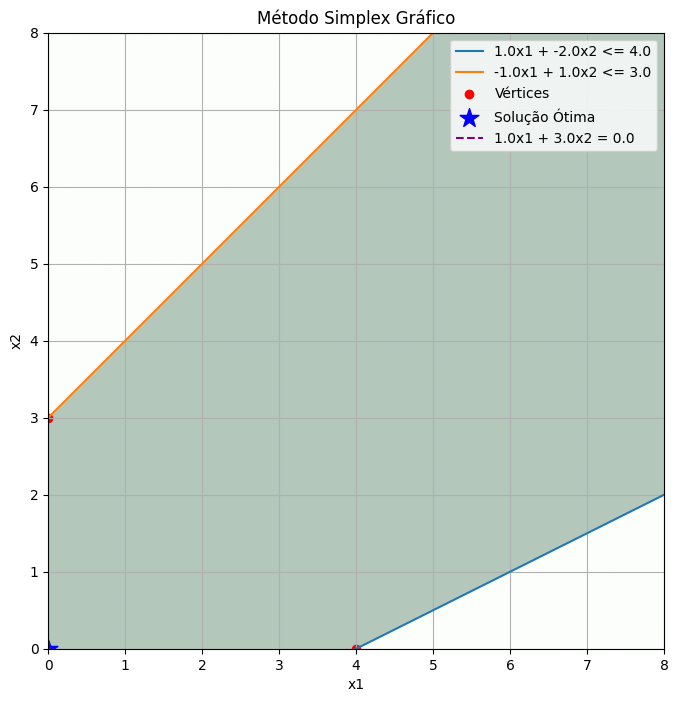


Resultado do Método Simplex Gráfico:
Solução Ótima (x1, x2): [0. 0.]
Valor Ótimo da Função Objetivo: 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def simplex_tableau(c, A, b):
    """
    Resolve problemas de otimização linear usando o método simplex com tableau.

    Args:
        c (np.array): Vetor de custos (coeficientes da função objetivo).
        A (np.array): Matriz de coeficientes das restrições.
        b (np.array): Vetor dos lados direitos das restrições.

    Returns:
        tuple: Uma tupla contendo:
            - optimal_solution (np.array): A solução ótima.
            - optimal_value (float): O valor ótimo da função objetivo.
            - tableau (np.array): O tableau final.
    """
    num_vars = A.shape[1]
    num_constraints = A.shape[0]

    # Adicionar variáveis de folga (para <=) e de excesso (para >=)
    slack_excess = np.eye(num_constraints)
    A_augmented = np.hstack((A, slack_excess))

    # Criar a matriz básica inicial (variáveis de folga/excesso)
    basic_vars = np.arange(num_vars, num_vars + num_constraints)
    non_basic_vars = np.arange(num_vars)

    # Criar o tableau inicial
    tableau = np.zeros((num_constraints + 1, A_augmented.shape[1] + 1))
    tableau[0, :-1] = np.hstack((-c, np.zeros(num_constraints)))  # Linha da função objetivo (z)
    tableau[1:, :-1] = A_augmented
    tableau[1:, -1] = b

    print("Tableau Inicial:")
    print(tableau)

    iteration = 0
    while True:
        iteration += 1
        print(f"\nIteração {iteration}:")

        # 1. Escolher a coluna pivô (variável entrante)
        objective_row = tableau[0, :-1]
        pivot_col_index = np.argmin(objective_row)

        if objective_row[pivot_col_index] >= 0:
            print("Solução ótima encontrada.")
            break

        pivot_col = tableau[1:, pivot_col_index]

        # 2. Escolher a linha pivô (variável sainte)
        ratios = []
        for i in range(num_constraints):
            if pivot_col[i] > 0:
                ratios.append(tableau[i + 1, -1] / pivot_col[i])
            else:
                ratios.append(np.inf)

        pivot_row_index = np.argmin(ratios)

        if ratios[pivot_row_index] == np.inf:
            raise ValueError("O problema é ilimitado.")

        pivot_row_original_index = pivot_row_index + 1
        pivot_value = tableau[pivot_row_original_index, pivot_col_index]

        print(f"Coluna Pivô (Variável Entrante): Coluna {pivot_col_index} (Variável x_{pivot_col_index+1} ou de folga/excesso)")
        print(f"Linha Pivô (Variável Saindo): Linha {pivot_row_original_index} (Variável básica na posição {basic_vars[pivot_row_index]+1})")
        print(f"Elemento Pivô: {pivot_value}")

        # Atualizar as variáveis básicas e não básicas
        exiting_var_index = basic_vars[pivot_row_index]
        entering_var_index = non_basic_vars[pivot_col_index]
        basic_vars[pivot_row_index] = entering_var_index
        non_basic_vars[pivot_col_index] = exiting_var_index

        # 3. Realizar as operações de linha para tornar o elemento pivô 1 e os outros elementos da coluna pivô 0
        tableau[pivot_row_original_index, :] = tableau[pivot_row_original_index, :] / pivot_value
        for i in range(num_constraints + 1):
            if i != pivot_row_original_index:
                factor = tableau[i, pivot_col_index]
                tableau[i, :] = tableau[i, :] - factor * tableau[pivot_row_original_index, :]

        print("\nTableau após a iteração:")
        print(tableau)

    # Extrair a solução ótima
    optimal_solution = np.zeros(num_vars)
    for i, var_index in enumerate(basic_vars):
        if var_index < num_vars:
            optimal_solution[var_index] = tableau[i + 1, -1]

    optimal_value = -tableau[0, -1]

    return optimal_solution, optimal_value, tableau

def simplex_grafico(c, A, b, constraints_type):
    """
    Resolve problemas de otimização linear com duas variáveis usando o método simplex gráfico.

    Args:
        c (np.array): Vetor de custos (coeficientes da função objetivo) de tamanho 2.
        A (np.array): Matriz de coeficientes das restrições (cada linha representa uma restrição).
        b (np.array): Vetor dos lados direitos das restrições.
        constraints_type (list): Lista de strings indicando o tipo de cada restrição ('<=' ou '>=').

    Returns:
        tuple: Uma tupla contendo:
            - optimal_solution (np.array): A solução ótima [x1, x2].
            - optimal_value (float): O valor ótimo da função objetivo.
    """
    if c.shape[0] != 2 or A.shape[1] != 2:
        raise ValueError("O método gráfico só pode ser aplicado a problemas com duas variáveis.")

    x1 = np.linspace(0, max(b) * 2 if b.size > 0 else 10, 400)
    x2 = np.linspace(0, max(b) * 2 if b.size > 0 else 10, 400)
    X1, X2 = np.meshgrid(x1, x2)

    plt.figure(figsize=(8, 8))

    # Plotar as restrições
    feasible_region = np.ones(X1.shape, dtype=bool)
    for i in range(A.shape[0]):
        if A[i, 1] != 0:
            x2_boundary = (b[i] - A[i, 0] * x1) / A[i, 1]
            plt.plot(x1, x2_boundary, label=f'{A[i, 0]}x1 + {A[i, 1]}x2 {constraints_type[i]} {b[i]}')
            if constraints_type[i] == '<=':
                feasible_region &= (A[i, 0] * X1 + A[i, 1] * X2 <= b[i])
            elif constraints_type[i] == '>=':
                feasible_region &= (A[i, 0] * X1 + A[i, 1] * X2 >= b[i])
        elif A[i, 0] != 0:
            x1_boundary = b[i] / A[i, 0]
            plt.axvline(x=x1_boundary, label=f'{A[i, 0]}x1 {constraints_type[i]} {b[i]}')
            if constraints_type[i] == '<=':
                feasible_region &= (A[i, 0] * X1 <= b[i])
            elif constraints_type[i] == '>=':
                feasible_region &= (A[i, 0] * X1 >= b[i])

    feasible_region &= (X1 >= 0) & (X2 >= 0)
    plt.imshow(feasible_region.astype(int), extent=(x1.min(), x1.max(), x2.min(), x2.max()),
               origin='lower', cmap='Greens', alpha=0.3)

    # Encontrar os vértices da região factível
    vertices = set()
    lines = []
    for i in range(A.shape[0]):
        if A[i, 1] != 0:
            lines.append((A[i, 0], A[i, 1], b[i]))
        elif A[i, 0] != 0:
            lines.append((A[i, 0], 0, b[i]))

    lines.append((1, 0, 0))  # x1 >= 0
    lines.append((0, 1, 0))  # x2 >= 0

    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            a1, b1, c1 = lines[i]
            a2, b2, c2 = lines[j]
            determinant = a1 * b2 - a2 * b1
            if determinant != 0:
                x1_intersect = (c1 * b2 - c2 * b1) / determinant
                x2_intersect = (a1 * c2 - a2 * c1) / determinant
                if x1_intersect >= -1e-9 and x2_intersect >= -1e-9: # Considerar pequenas imprecisões numéricas
                    # Verificar se o ponto de interseção satisfaz todas as restrições
                    is_feasible = True
                    for k in range(A.shape[0]):
                        inequality_value = np.dot(A[k], [x1_intersect, x2_intersect])
                        if constraints_type[k] == '<=' and inequality_value > b[k] + 1e-9:
                            is_feasible = False
                            break
                        elif constraints_type[k] == '>=' and inequality_value < b[k] - 1e-9:
                            is_feasible = False
                            break
                    if is_feasible and x1_intersect >= -1e-9 and x2_intersect >= -1e-9:
                        vertices.add((round(x1_intersect, 6), round(x2_intersect, 6)))

    vertices = list(vertices)
    vertex_values = [np.dot(c, v) for v in vertices]

    if not vertices:
        print("A região factível é vazia.")
        return None, None

    if np.all(c >= 0):
        optimal_index = np.argmin(vertex_values)
    else:
        optimal_index = np.argmax(vertex_values)

    optimal_solution = np.array(vertices[optimal_index])
    optimal_value = vertex_values[optimal_index]

    # Plotar os vértices e a solução ótima
    vertex_x, vertex_y = zip(*vertices)
    plt.scatter(vertex_x, vertex_y, color='red', label='Vértices')
    plt.scatter(optimal_solution[0], optimal_solution[1], color='blue', marker='*', s=200, label='Solução Ótima')

    # Plotar a função objetivo (uma curva de nível)
    x1_obj = np.linspace(0, max(b) * 2 if b.size > 0 else 10, 400)
    if c[1] != 0:
        x2_obj = (optimal_value - c[0] * x1_obj) / c[1]
        plt.plot(x1_obj, x2_obj, '--', color='purple', label=f'{c[0]}x1 + {c[1]}x2 = {optimal_value}')
    elif c[0] != 0:
        plt.axvline(x=optimal_value / c[0], color='purple', linestyle='--', label=f'{c[0]}x1 = {optimal_value}')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Método Simplex Gráfico')
    plt.xlim(0, max(b) * 2 if b.size > 0 else 10)
    plt.ylim(0, max(b) * 2 if b.size > 0 else 10)
    plt.grid(True)
    plt.legend()
    plt.show()

    return optimal_solution, optimal_value

if __name__ == "__main__":
    print("Escolha o método a ser utilizado:")
    print("1. Método Simplex com Tableau (para problemas gerais)")
    print("2. Método Simplex Gráfico (para problemas com duas variáveis)")

    choice = input("Digite o número da sua escolha: ")

    if choice == '1':
        num_vars = int(input("Digite o número de variáveis: "))
        num_constraints = int(input("Digite o número de restrições: "))

        print("Digite os coeficientes da função objetivo (separados por espaço):")
        c_input = input().split()
        c = np.array([-float(val) for val in c_input]) # Negativo para maximização

        A = np.zeros((num_constraints, num_vars))
        constraints_type = []
        b = np.zeros(num_constraints)

        print("Digite as restrições linha por linha no formato: 'coef1 coef2 ... tipo valor_lado_direito'")
        print("Exemplo: '2 3 <= 10' ou '1 -1 >= 5'")
        for i in range(num_constraints):
            row_input = input(f"Restrição {i+1}: ").split()
            coeffs = np.array([float(val) for val in row_input[:-2]])
            tipo = row_input[-2]
            valor = float(row_input[-1])

            if len(coeffs) != num_vars:
                raise ValueError(f"Número incorreto de coeficientes na restrição {i+1}.")

            A[i, :] = coeffs
            constraints_type.append(tipo)
            b[i] = valor

            if tipo == '>=':
                A[i, :] *= -1
                b[i] *= -1

        try:
            optimal_solution, optimal_value, tableau = simplex_tableau(-c, A, b) # Passando c original (positivo) para o tableau
            print("\nResultado do Método Simplex (Tableau):")
            print(f"Solução Ótima: {optimal_solution}")
            print(f"Valor Ótimo da Função Objetivo: {optimal_value}")
            print("\nTableau Final:")
            print(tableau)
        except ValueError as e:
            print(f"Erro: {e}")

    elif choice == '2':
        num_vars = int(input("Digite o número de variáveis (deve ser 2 para o método gráfico): "))
        if num_vars != 2:
            print("O método gráfico só funciona para problemas com duas variáveis.")
        else:
            num_constraints = int(input("Digite o número de restrições: "))

            print("Digite os coeficientes da função objetivo (separados por espaço):")
            c_input = input().split()
            c_grafico = np.array([float(val) for val in c_input])

            A_grafico = np.zeros((num_constraints, num_vars))
            b_grafico = np.zeros(num_constraints)
            constraints_type_grafico = []

            print("Digite as restrições linha por linha no formato: 'coef1 coef2 tipo valor_lado_direito'")
            print("Exemplo: '2 3 <= 10' ou '1 -1 >= 5'")
            for i in range(num_constraints):
                row_input = input(f"Restrição {i+1}: ").split()
                A_grafico[i, 0] = float(row_input[0])
                A_grafico[i, 1] = float(row_input[1])
                constraints_type_grafico.append(row_input[2])
                b_grafico[i] = float(row_input[3])

            try:
                optimal_solution_grafico, optimal_value_grafico = simplex_grafico(c_grafico, A_grafico, b_grafico, constraints_type_grafico)
                if optimal_solution_grafico is not None:
                    print("\nResultado do Método Simplex Gráfico:")
                    print(f"Solução Ótima (x1, x2): {optimal_solution_grafico}")
                    print(f"Valor Ótimo da Função Objetivo: {optimal_value_grafico}")
            except ValueError as e:
                print(f"Erro: {e}")

    else:
        print("Opção inválida.")